# Improve Resolution use ESRGAN

## Import Model & Library

In [1]:
pip install torchvision==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98

In [2]:
import torchvision
print(torchvision.__version__)

0.15.1+cu117


Same ESRGAN authors

> https://github.com/xinntao/Real-ESRGAN

In [3]:
import os
import glob
import cv2
import numpy as np
import torch
from google.colab.patches import cv2_imshow

In [4]:
!git clone https://github.com/xinntao/Real-ESRGAN.git

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 757 (from 2)
Receiving objects: 100% (759/759), 5.39 MiB | 15.07 MiB/s, done.
Resolving deltas: 100% (406/406), done.


In [24]:
%cd Real-ESRGAN/

/content/Real-ESRGAN


In [6]:
!pwd

/content/Real-ESRGAN


In [7]:
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 17.7 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214817 sha256=122d4713ba9000309cfcb412b57c82461b2397de5ac4a9450db150fee61b9afc
  Stored in directory: /root/.cache/pip/wheels/6d/a4/b3/9f888ba88efcae6dd4bbce69832363de9c4051142674f779fa
Successfully built basicsr
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 416.0 kB/s eta 0:00:00
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.w

## Use Model

> Parameter 1: model

Available models:

* RealESRGAN_x4plus (default)
* RealESRNet_x4plus
* RealESRGAN_x4plus_anime_6B
* RealESRGAN_x2plus
* realesr-animevideov3
* realesr-general-x4v3

> Parameter 2: folder where the images are

> Parameter 3: how much it will be increased



In [25]:
!pwd

/content/Real-ESRGAN


In [26]:
!python inference_realesrgan.py -n RealESRGAN_x4plus -i /content/low_resolution --outscale 4 --fp32 --output /content/high_resolution

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Testing 0 baboon
Testing 1 kartun_low200pix
Testing 2 kartun_low200pix_2
Testing 3 kartun_low200pix_3
Testing 4 kartun_low200pix_4


## Result

In [13]:
%cd /content

/content


In [14]:
pip install Pillow

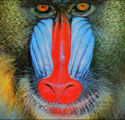

In [15]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/low_resolution/baboon.png')

# Display the image
cv2_imshow(image)


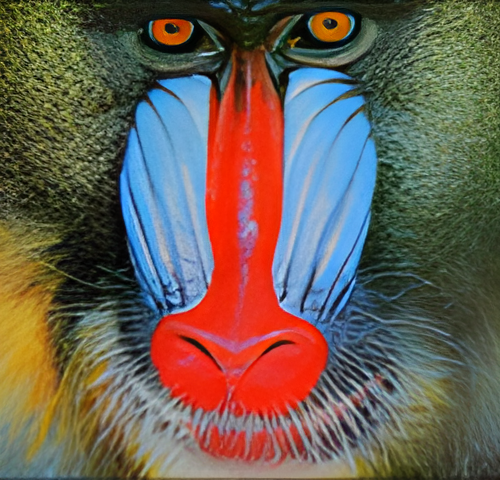

In [27]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/high_resolution/baboon_out.png')

# Display the image
cv2_imshow(image)


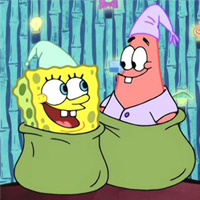

In [16]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/low_resolution/kartun_low200pix.png')

# Display the image
cv2_imshow(image)


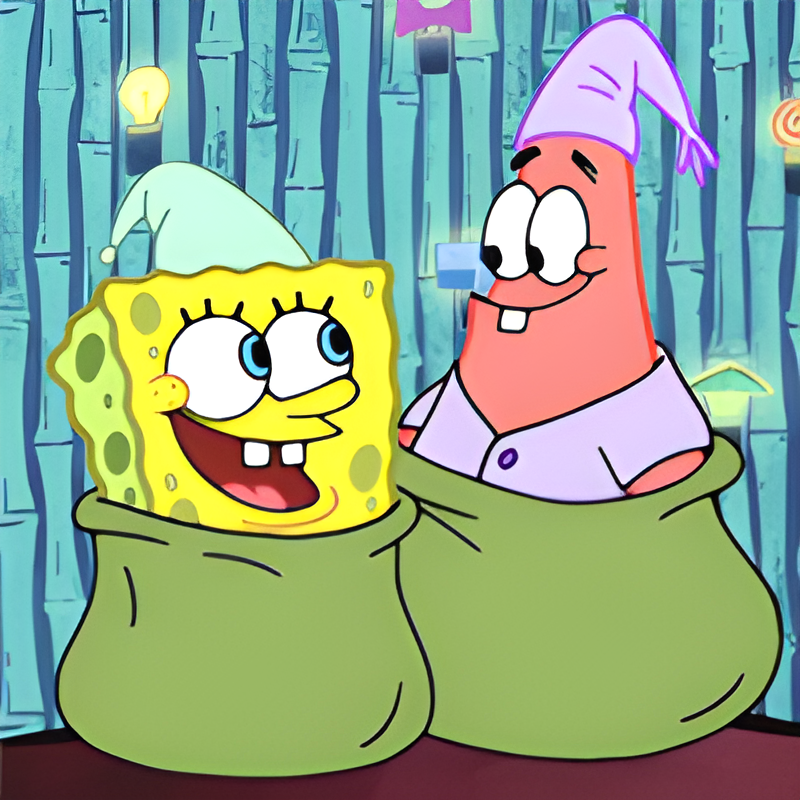

In [28]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/high_resolution/kartun_low200pix_out.png')

# Display the image
cv2_imshow(image)


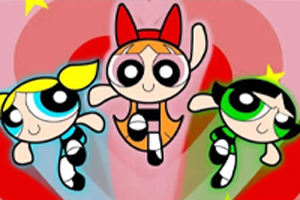

In [17]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/low_resolution/kartun_low200pix_2.png')

# Display the image
cv2_imshow(image)


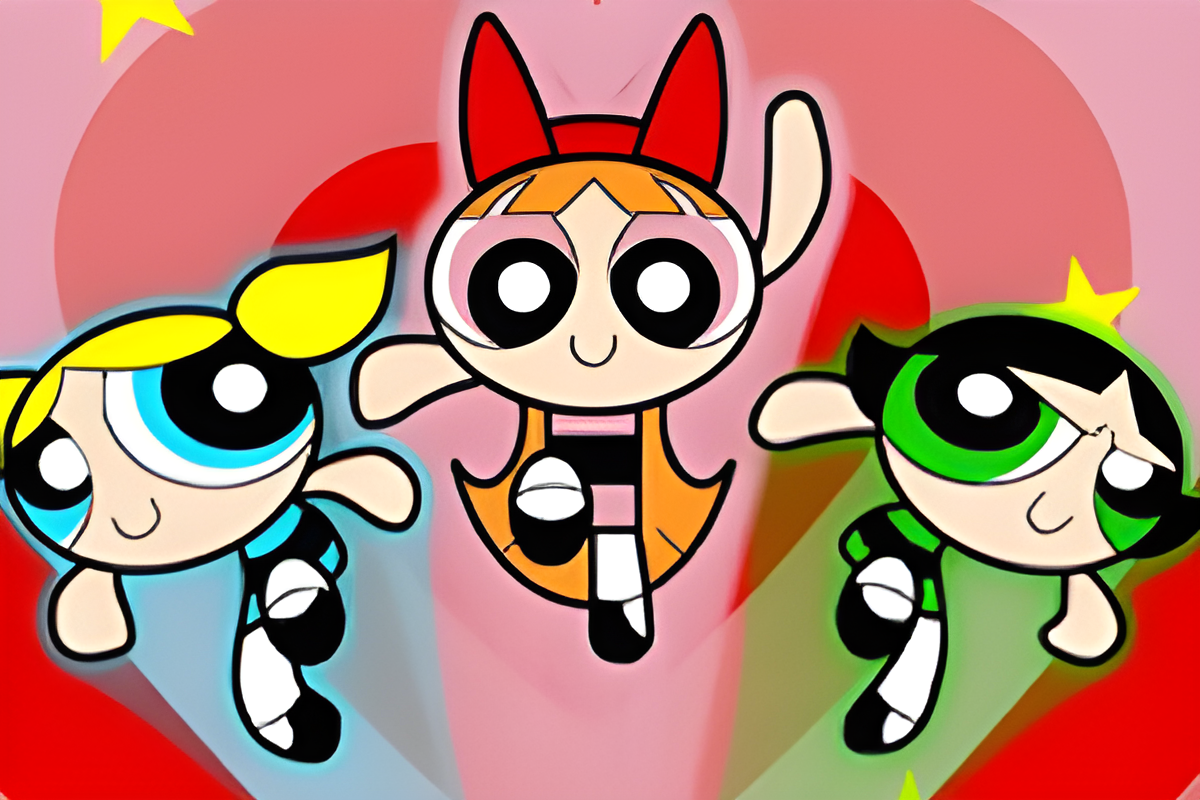

In [29]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/high_resolution/kartun_low200pix_2_out.png')

# Display the image
cv2_imshow(image)


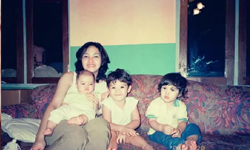

In [19]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/low_resolution/kartun_low200pix_4.png')

# Display the image
cv2_imshow(image)


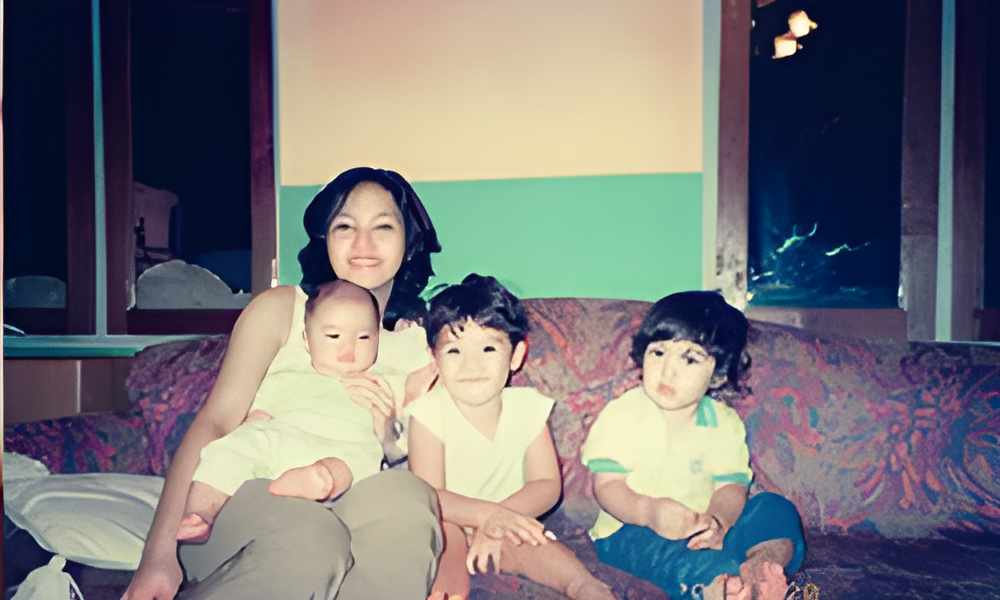

In [31]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/high_resolution/kartun_low200pix_4_out.png')

# Display the image
cv2_imshow(image)


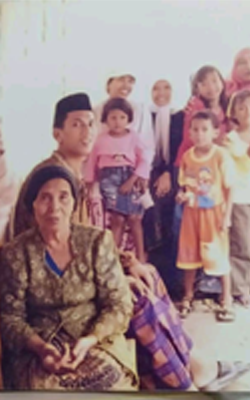

In [18]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/low_resolution/kartun_low200pix_3.png')

# Display the image
cv2_imshow(image)


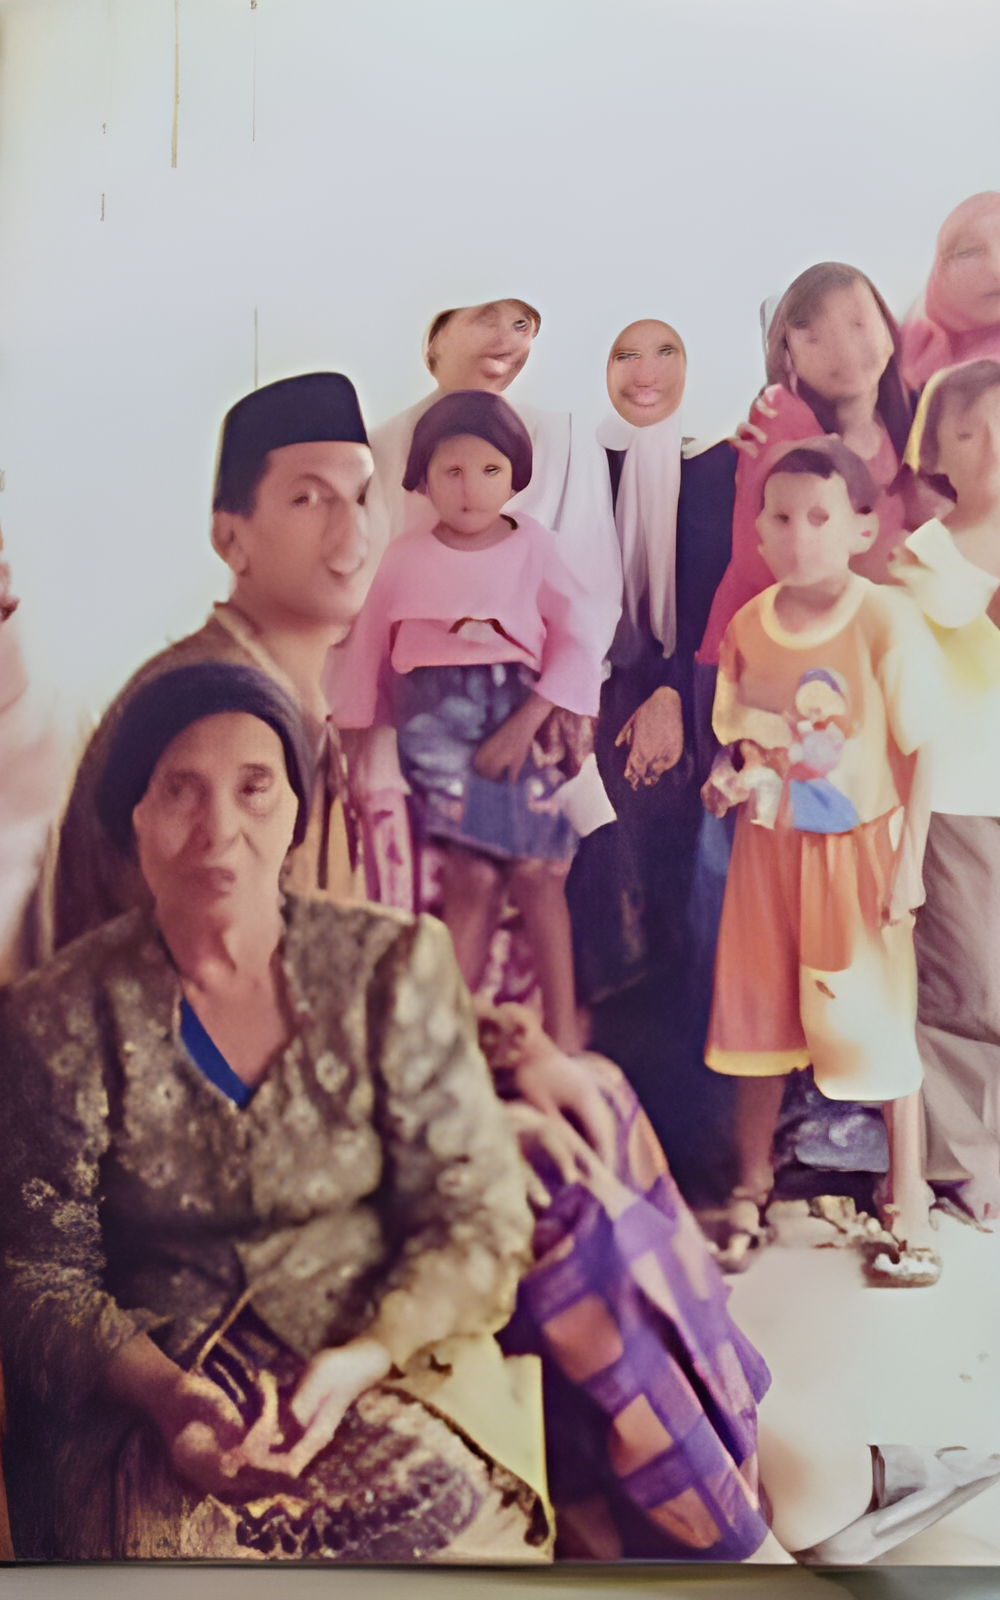

In [30]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread()
image = cv2.imread('/content/high_resolution/kartun_low200pix_3_out.png')

# Display the image
cv2_imshow(image)
